<h2>Effects of dimensionality reduction with PCA and feature selection in regression and classification performance using weather data</h2>



The task is to use linear regression to predict relative humidity based on observations, find the significant predicting features and examine the change in metrics and model performance after dimensionality reduction with Principal Component Analysis (PCA) and feature selection. In addition, K-nearest Neighbors and Logistic Regression are used to classify whether the weather conditions are “dry” or “not dry” and  the accuracy of the methods are compared after reducing dimensionality with PCA and feature selection.




In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing & dimensionality reduction libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#ML model libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metric libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [20]:
def import_files():
    X_train = pd.read_csv('weather_data_train.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
    y_train = pd.read_csv('weather_data_train_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
    X_test = pd.read_csv('weather_data_test.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)
    y_test = pd.read_csv('weather_data_test_labels.csv', index_col='datetime', sep=';', decimal=',', infer_datetime_format=True)

    return X_train, y_train, X_test, y_test

In [21]:
# Drop regression target column from y
# Uncomment to examine the performance without some features
def preprocess_drop_classification(df_y_train, df_y_test):
    y_test = df_y_test.drop(["U_mu"],axis=1)
    y_train = df_y_train.drop(["U_mu"],axis=1)

    #X = X.drop(["Tx_mu"],axis=1)
    #X = X.drop(["Tn_mu"],axis=1)
    #X = X.drop(["Ff_mu"],axis=1)
    #X = X.drop(["Ff_var"],axis=1)
    #X = X.drop(["Po_mu"],axis=1)
    #X = X.drop(["Po_var"],axis=1)
    #X = X.drop(["P_var"],axis=1)
    #X = X.drop(["P_mu"],axis=1)
    #X = X.drop(["VV_var"],axis=1)
    #X = X.drop(["VV_mu"],axis=1)

    #X_test = X_test.drop(["Tx_mu"],axis=1)
    #X_test = X_test.drop(["Tn_mu"],axis=1)
    #X_test = X_test.drop(["Ff_mu"],axis=1)
    #X_test = X_test.drop(["Ff_var"],axis=1)
    #X_test = X_test.drop(["Po_mu"],axis=1)
    #X_test = X_test.drop(["Po_var"],axis=1)
    #X_test = X_test.drop(["P_var"],axis=1)
    #X_test = X_test.drop(["P_mu"],axis=1)
    #X_test = X_test.drop(["VV_var"],axis=1)
    #X_test = X_test.drop(["VV_mu"],axis=1)
    return y_train, y_test

In [22]:
# Drop classification target from y
# Uncomment to examine the performance without some features
def preprocess_drop_regression(df_train, df_test, df_y_train, df_y_test):
    y_train = df_y_train.drop(['OBSERVED'], axis=1)
    y_test = df_y_test.drop(['OBSERVED'], axis=1)

    #X = X.drop(["Tx_mu"],axis=1)
    #X = X.drop(["Tn_mu"],axis=1)
    #X = X.drop(["Ff_mu"],axis=1)
    #X = X.drop(["Ff_var"],axis=1)
    #X = X.drop(["Po_mu"],axis=1)
    #X = X.drop(["Po_var"],axis=1)
    #X = X.drop(["P_var"],axis=1)
    #X = X.drop(["P_mu"],axis=1)
    #X = X.drop(["VV_var"],axis=1)
    #X = X.drop(["VV_mu"],axis=1)

    #X_test = X_test.drop(["Tx_mu"],axis=1)
    #X_test = X_test.drop(["Tn_mu"],axis=1)
    #X_test = X_test.drop(["Ff_mu"],axis=1)
    #X_test = X_test.drop(["Ff_var"],axis=1)
    #X_test = X_test.drop(["Po_mu"],axis=1)
    #X_test = X_test.drop(["Po_var"],axis=1)
    #X_test = X_test.drop(["P_var"],axis=1)
    #X_test = X_test.drop(["P_mu"],axis=1)
    #X_test = X_test.drop(["VV_var"],axis=1)
    #X_test = X_test.drop(["VV_mu"],axis=1)
    return X_train, X_test, y_train, y_test

In [23]:
# Scale the data to a range (default range [0,1])
def apply_minmax(df_train, df_test):
    mm_scaler = MinMaxScaler()
    X_train = mm_scaler.fit_transform(df_train)
    X_test = mm_scaler.transform(df_test)
    return X_train, X_test

In [24]:
# Transform train and test data to mean value 0 and standard deviation of 1 with sklearn StardardScaler
def std_scaler(df_train, df_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(df_train)
    X_test_scaled = scaler.transform(df_test)
    return X_train_scaled, X_test_scaled

In [25]:
# Apply PCA to train and test data. n is the amount of components, 0 < n < 16 or n = 0 for plot of cumulative explained variance plot
def apply_pca(df_train,df_test,n):
    pca = PCA(n_components=n)
    pca_df_train = pca.fit(df_train)
    pca_df = pca.transform(df_train)
    pca_df_test = pca.transform(df_test)
    
    #Uncomment to show explained variance plot
    #plt.plot(np.cumsum((pca.explained_variance_ratio_)))

    return pca_df, pca_df_test

In [26]:
# Linear regression 
def apply_linreg(df_train,df_test,df_y_train,df_y_test): 
    model = LinearRegression()
    model.fit(df_train, df_y_train)
    y_pred = model.predict(df_test)    

    print("Mean squared error: {}\n".format(metrics.mean_squared_error(df_y_test,y_pred)))

    print("R2_score: {}\n".format(metrics.r2_score(df_y_test,y_pred)))

    print(model.coef_)


In [27]:
# K-nearest Neighbors
def apply_knn(df_train,df_test,df_y_train,df_y_test,n):
    knn = KNeighborsClassifier(n_neighbors=n)

    labels=[0,1]
        
    knn.fit(df_train,df_y_train.values.ravel())
    y_predict_knn = knn.predict(df_test)
    print(classification_report(df_y_test, y_predict_knn, labels=[0, 1]))
    print(confusion_matrix(df_y_test, y_predict_knn))

In [28]:
# Logistic Regression
def apply_logreg(df_train,df_test,df_y_train,df_y_test):
    l_reg = LogisticRegression()
    l_reg.fit(df_train, df_y_train.values.ravel())
    y_pred_lreg = l_reg.predict(df_test)

    labels=[0,1]
    # Use score method to get accuracy of model
    score = l_reg.score(df_test, df_y_test)
    print(classification_report(df_y_test, y_pred_lreg,labels=[0, 1]))
    print(confusion_matrix(df_y_test, y_pred_lreg,labels))

In [29]:
# Regression task with Linear Regression
# - Import & preprocess data, standardscaler, drop features
# - uncomment to apply PCA
# - Apply LinReg
# - Print metrics

X_train, y_train, X_test, y_test = import_files()

X_train, X_test, y_train, y_test = preprocess_drop_regression(X_train, X_test, y_train, y_test)

X_train, X_test = std_scaler(X_train, X_test)

#Uncomment below to apply pca and choose "n"
#X_train, X_test = apply_pca(X_train, X_test, 12)

print("Linear Regression with original data:\n")
apply_linreg(X_train, X_test, y_train, y_test)

Linear Regression with original data:

Mean squared error: 2.4295688076984705

R2_score: 0.9849910138257619

[[-3.76284733e+01  8.16675788e+00 -8.41055139e+00 -2.53631727e-01
   2.39034041e+00 -3.00977805e+00 -7.67203873e-01  3.68106919e+01
   2.94467131e-01  1.16201822e+00 -1.12019198e+00 -3.31951016e-02
   3.10722638e-01 -5.14411816e-02  8.83555804e-02  2.09863754e-01]]


In [30]:
#Logistic Regression
X_train, y_train, X_test, y_test = import_files()

y_train, y_test = preprocess_drop_classification(y_train, y_test)

X_train, X_test = std_scaler(X_train, X_test)
X_train, X_test = apply_minmax(X_train, X_test)

#Uncomment below to apply pca and choose "n"
#X_train, X_test = apply_pca(X_train, X_test, 12)

apply_logreg(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       428
           1       0.86      0.83      0.85       918

    accuracy                           0.79      1346
   macro avg       0.76      0.77      0.77      1346
weighted avg       0.80      0.79      0.80      1346

[[306 122]
 [156 762]]


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
#K-nearest Neighbor
X_train, y_train, X_test, y_test = import_files()

y_train, y_test = preprocess_drop_classification(y_train, y_test)

X_train, X_test = std_scaler(X_train, X_test)
X_train, X_test = apply_minmax(X_train, X_test)

#Uncomment below to apply pca and choose "n"
#X_train, X_test = apply_pca(X_train, X_test, 12)

#choose n-amount of neighbors
apply_knn(X_train, X_test, y_train, y_test, 21)

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       428
           1       0.86      0.84      0.85       918

    accuracy                           0.80      1346
   macro avg       0.77      0.78      0.77      1346
weighted avg       0.80      0.80      0.80      1346

[[305 123]
 [144 774]]


In [32]:
# VISUALIZATIONS

X_train, y_train, X_test, y_test = import_files()
df = pd.concat([X_train,y_train['U_mu']], axis=1)
df = pd.concat([df,y_train['OBSERVED']], axis=1)

df.describe()

,T_mu,Po_mu,P_mu,Ff_mu,Tn_mu,Tx_mu,VV_mu,Td_mu,T_var,Po_var,P_var,Ff_var,Tn_var,Tx_var,VV_var,Td_var,U_mu,OBSERVED
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,6.780096,758.805939,759.148643,3.674008,4.888025,8.661810,25.952053,3.373812,4.466326,4.062051,4.058249,1.345066,3.662163,4.132288,98.008192,2.768010,80.813907,0.605732
std,8.595021,8.521047,8.525485,1.222216,8.595641,8.910328,12.230215,8.083700,5.254302,7.278152,7.274098,1.255878,7.034635,5.929607,106.710901,4.497696,11.897763,0.488771
min,-19.312500,725.525000,725.875000,1.000000,-26.200000,-16.950000,0.625000,-22.912500,0.016429,0.005000,0.005714,0.000000,0.000000,0.000000,0.000000,0.008095,34.285714,0.000000
25%,0.987500,753.471875,753.821875,2.750000,-0.250000,2.250000,16.421875,-1.612500,0.928571,0.492604,0.500000,0.571429,0.125000,0.382500,20.408036,0.582143,74.093750,0.000000
50%,6.537500,758.850000,759.187500,3.500000,4.750000,8.125000,24.875000,3.118750,2.568839,1.516964,1.519107,0.982143,0.980000,2.000000,55.928571,1.313125,83.500000,1.000000
75%,13.953125,764.178125,764.525000,4.375000,11.950000,16.200000,35.375000,10.100000,6.169955,4.395759,4.418750,1.696429,3.920000,5.780000,140.008884,3.089107,89.750000,1.000000
max,25.787500,790.425000,790.812500,9.750000,23.150000,28.500000,50.000000,21.462500,66.571250,108.117143,108.515536,17.571429,93.845000,105.125000,645.760000,77.449821,99.875000,1.000000


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

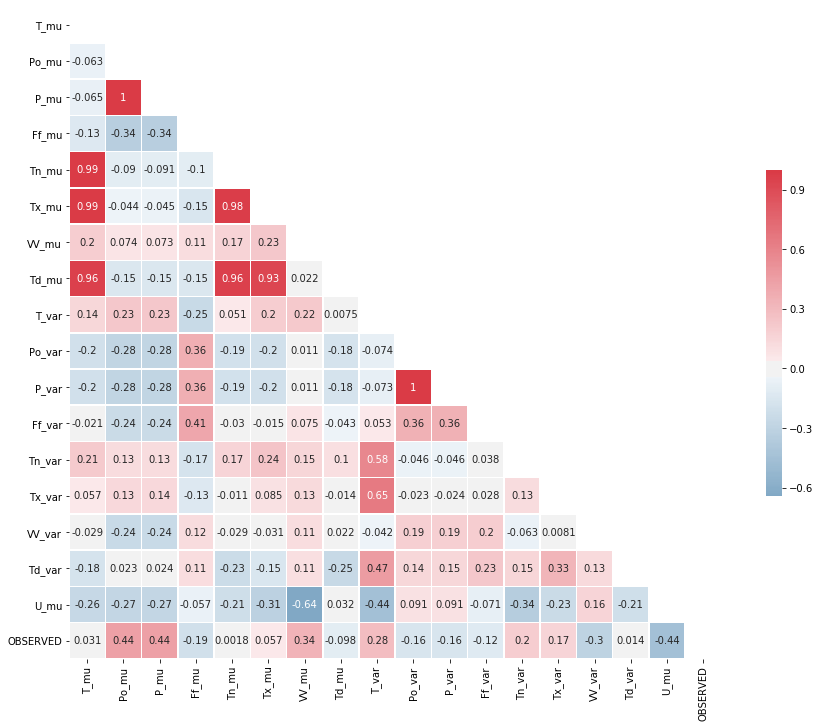

In [33]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.yticks(rotation=0)


([], <a list of 0 Text yticklabel objects>)

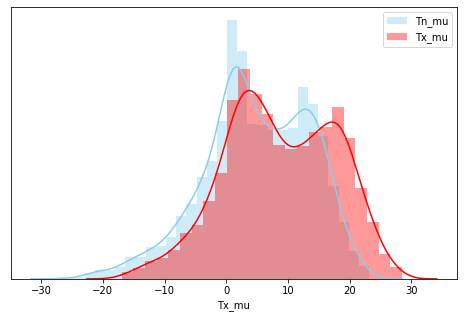

In [34]:
f_1, ax_1 = plt.subplots(figsize=(8, 5))
sns.distplot(X_train['Tn_mu'], color="skyblue", label="Tn_mu")
sns.distplot(X_train['Tx_mu'], color="red", label="Tx_mu")
plt.legend()
plt.yticks([])

Text(0.5, 0, 'Number of components')

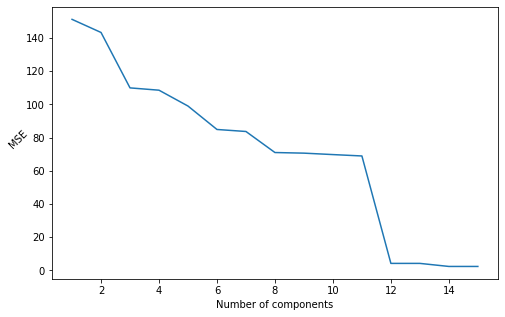

In [35]:
# Mean squared error for each instance of components used


scores = []
r2 = []
r = range(1,16)
for i in r:
    X_train, y_train, X_test, y_test = import_files()

    X_train, X_test, y_train, y_test = preprocess_drop_regression(X_train, X_test, y_train, y_test)

    X_train, X_test = std_scaler(X_train, X_test)

    X_train, X_test = apply_pca(X_train, X_test, i)
    
    mdl = LinearRegression()
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)

    scores.append(metrics.mean_squared_error(y_test,y_pred))
    r2.append(metrics.r2_score(y_test,y_pred))


# Plot for MSE and components used
plt.figure(figsize=(8,5))
sns.lineplot(x=r, y=scores)
plt.ylabel("MSE", rotation=45)
plt.xlabel("Number of components")

Text(0.5, 0, 'Number of components')

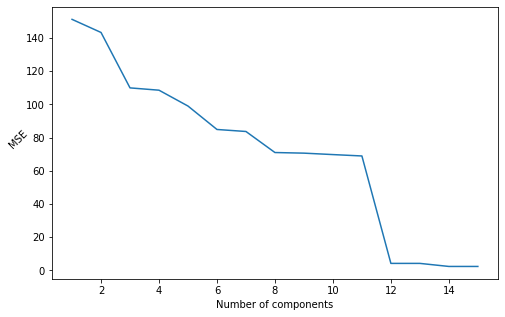

In [36]:
# Mean squared error metric for each instance of components used


scores = []
r2 = []
r = range(1,16)

for i in r:
    X_train, y_train, X_test, y_test = import_files()

    X_train, X_test, y_train, y_test = preprocess_drop_regression(X_train, X_test, y_train, y_test)

    X_train, X_test = std_scaler(X_train, X_test)

    X_train, X_test = apply_pca(X_train, X_test, i)
    
    mdl = LinearRegression()
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)

    scores.append(metrics.mean_squared_error(y_test,y_pred))
    r2.append(metrics.r2_score(y_test,y_pred))


# Plot for MSE and components used
plt.figure(figsize=(8,5))
sns.lineplot(x=r, y=scores)
plt.ylabel("MSE", rotation=45)
plt.xlabel("Number of components")

0.8098068350668648

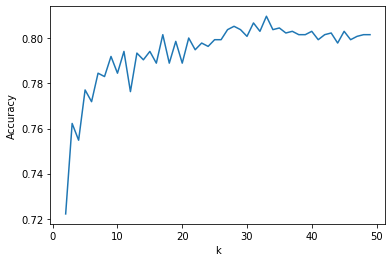

In [55]:
# Test KNN with different parameters for principal components and k-neighbors
# Edit the variable "components" to change the nr. of components

scores_knn_1 = []
r = range(2,50)
components = 7

for i in r:
    X_train, y_train, X_test, y_test = import_files()
    y_train, y_test = preprocess_drop_classification(y_train, y_test)
    
    X_train, X_test = std_scaler(X_train, X_test)
    X_train, X_test = apply_minmax(X_train, X_test)
    
    #Comment next line to test without PCA
    X_train, X_test = apply_pca(X_train, X_test, components)
    
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    y_predict = knn.predict(X_test)
    scores_knn_1.append(accuracy_score(y_test,y_predict))
    
    
    
sns.lineplot(x=r, y=scores_knn_1)
plt.ylabel("Accuracy")
plt.xlabel("k")
max(scores_knn_1)